## Shell Contact Example

In [14]:
# !pip install debugpy

In [15]:
import numpy as np

import dismech


geom = dismech.GeomParams(rod_r0=0.005,
                          shell_h=0.005)

material = dismech.Material(density=1200,
                            youngs_rod=0,
                            youngs_shell=2e8,
                            poisson_rod=0,
                            poisson_shell=0.5)

shell_contact_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=False,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=False,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-2,
                                  max_iter=25,
                                  total_time=1.0,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
#env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
# env.add_force('selfContact', delta=0.01*2*5e-3, h=5e-3)
env.add_force('selfContact', delta=1e-4, h=5e-3)
#env.set_static()   

geo = dismech.Geometry.from_txt('input_twoTriangleContact_p2p.txt')

robot = dismech.SoftRobot(geom, material, geo, shell_contact_sim, env)

u = robot.state.u
u[11] = -0.5
u[14] = -0.5
u[17] = -0.5

### Time Stepping

As we are performing a static simulation, we must change gravity for each time step.

In [16]:
stepper = dismech.ImplicitEulerTimeStepper(robot)

robots = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])

delta: 0.02
h: 1.0
K1: 750.0
scale:  200.0
upper limit for quadratic: 1.98
upper limit for smooth: 2.02
5000000.0
current_time:  0.01
5000000.000000005
current_time:  0.02
5000000.000000005
current_time:  0.03
5000000.000000005
current_time:  0.04
5000000.000000005
current_time:  0.05
5000000.000000005
current_time:  0.06
5000000.000000005
current_time:  0.07
5000000.000000005
current_time:  0.08
5000000.000000005
current_time:  0.09
5000000.000000005
current_time:  0.1
5000000.000000005
current_time:  0.11
5000000.000000005
current_time:  0.12
5000000.000000005
current_time:  0.13
5000000.000000005
current_time:  0.14
5000000.000000005
current_time:  0.15
5000000.000000005
current_time:  0.16
5000000.000000005
current_time:  0.17
5000000.000000005
current_time:  0.18
5037533.901927438
current_time:  0.19
5001531.05226794
current_time:  0.2
5320621.11602219
current_time:  0.21
5495121.657275668
current_time:  0.22
5023806.886540558
current_time:  0.23
11963743677.879822
current_time:  

In [17]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Shell contact p2p', plot_step=shell_contact_sim.plot_step)

fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

100


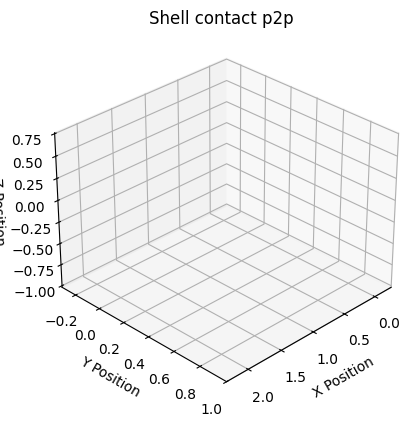

In [ ]:
#ani = dismech.get_animation(robot, t, qs, options)
#ani.save('5e-5.gif')